In [29]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import copy
sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Generate data

In [30]:
n = 50
d = 75
k = 5 
sigma = 1

# generate x_i
cov_mat = np.identity(d)
avg = np.zeros((d,))
x = np.random.multivariate_normal(avg,cov_mat,n)

# epsilon vec
epsilon_vec = np.random.normal(loc=0,scale=sigma)

# w_star_0
w_star_0 = 0
w_star = np.zeros((d,))
w_star[0:10] = np.random.randint(low = 1,high=3, size=10)
w_star[w_star==2] = -1

# generate y 
y = np.dot(x,w_star) + w_star_0 + epsilon_vec

### lasso!

In [133]:
delta = 1e-8
n = 50
d = 75

stop_cond = 100
w = np.random.random(d)
a = np.zeros((d,))
c = np.zeros((d,))
lambda_val = 1000
stop_cond_vec = []
w_old = np.zeros((d,))

while(stop_cond>delta):
    diff_y_x = y - np.dot(x,w)
    w_0 = (1/n)*np.sum(diff_y_x)
    
    for k in np.arange(d):
        a[k] = 2*np.dot(x[:,k].T,x[:,k])
                
        x_temp = np.delete(x,k,axis=1)
        w_temp = np.delete(w,k,axis=0)
        
        diff_y_x_w0 = y - w_0 - np.dot(x_temp,w_temp)
        c[k] = 2*np.dot(x[:,k].T,diff_y_x_w0)
        
        if c[k] < - lambda_val:
            w[k] = ((c[k]+lambda_val))/a[k]
        elif (-lambda_val < c[k] < lambda_val):
            w[k] = 0
        elif c[k] > lambda_val:
            w[k] = ((c[k]-lambda_val))/a[k]

    weight_diff = w - w_old
    w_old = copy.deepcopy(w)


    stop_cond = np.max(weight_diff)
    stop_cond_vec.append(stop_cond)

print(w)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


(array([  0.,   0.,   0.,   0.,   0.,  75.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

(50,)

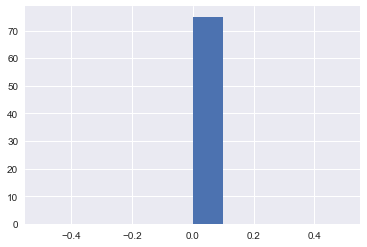

In [139]:
plt.hist(w)
np.shape(diff_y_x)

In [140]:
np.shape(diff_y_x_w0)
2*np.dot(x[:,k].T,diff_y_x_w0)
np.shape(w)
w
np.shape(x_temp)
np.shape(w_temp)
np.shape(a)

(50,)

-37.110034308899429

(75,)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

(50, 74)

(74,)

(75,)

In [136]:
b = np.delete(x,k,axis=1)
np.shape(b)

(50, 74)

In [137]:
np.shape(stop_cond_vec)

(1,)

<function matplotlib.pyplot.figure>

(0, 0.05)

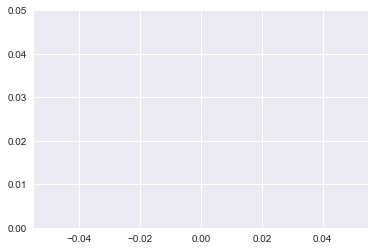

In [138]:
plt.figure
plt.plot(np.arange(len(stop_cond_vec)),stop_cond_vec)
plt.ylim([0,0.05])

In [24]:
a_old = 0
a= 10
difference = a-a_old


while difference > 3:
    a = a - 1
    a_old = a
    difference = a-a_old
    print(a)
    print(a_old)

9
9
